In [1]:
import os
from data_process import LabelDataReader, DataReader
#from models.model import UnetModel
from tool.config_utils import process_config
import numpy as np
import cv2

In [2]:
import matplotlib.pyplot as plt

In [3]:
config = None

try:
    config = process_config('segmention_config.json')
#    print(config)
except Exception as e:
    print('[Exception] Config Error, %s' % e)
    exit(0)
# np.random.seed(47)  # 固定随机数

In [4]:
print('[INFO] Preparing Data...')
labeldatareader = LabelDataReader(config=config)
labeldatareader.init()

print('train aug task')
lno_list, llower_list, lfull_list, label_list= labeldatareader.get_show_data()

[INFO] Preparing Data...
nolist: 99
lowerlist: 99
fulllist: 99
labellist: 99
(99, 240, 240)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
train aug task


In [5]:
from tool.eval_utils import compute_psnr_mean, compute_psnr_roi, compute_ssim
opsnrmean = list()
opsnrroi = list()
ossim = list()

In [17]:
def subpic(full, no):
    new = no.copy()
    for i in range(240):
        for j in range(240):
            if full[i][j] < no[i][j]:
#                print("full[{}][{}] is {}, no[{}][{}] is {}, set {} to new".format(i, j, full[i][j], i, j, no[i][j], full[i][j]))
                new[i][j] = full[i][j]
    
    return new

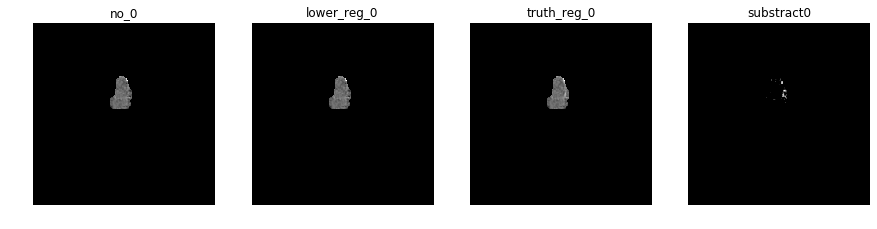

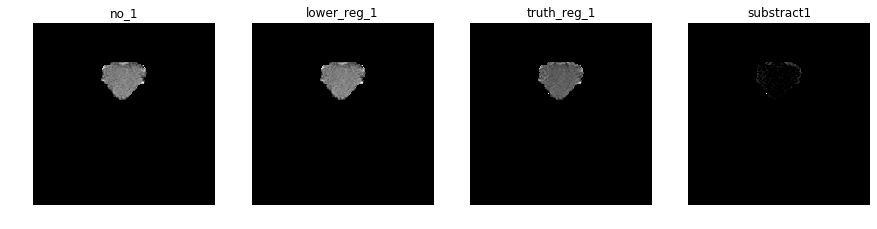

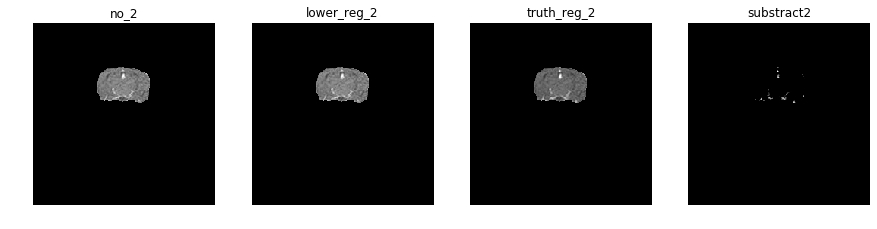

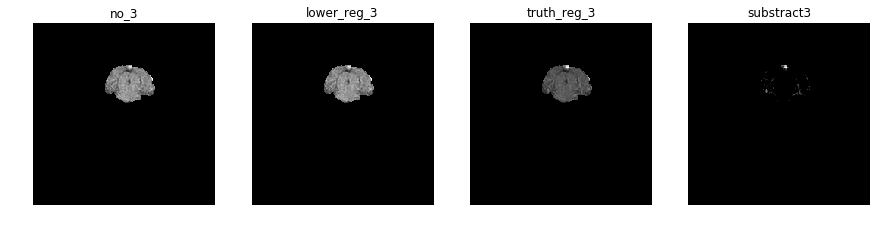

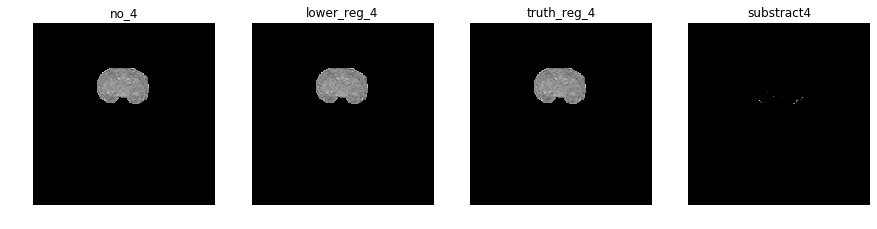

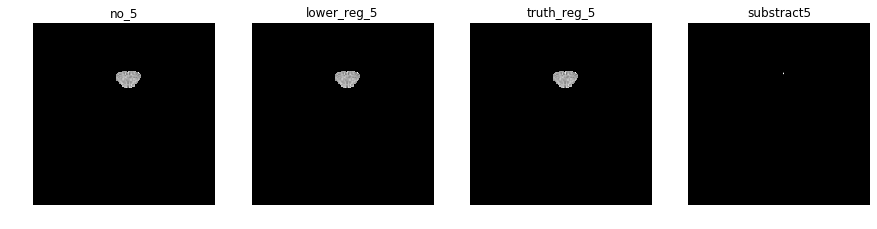

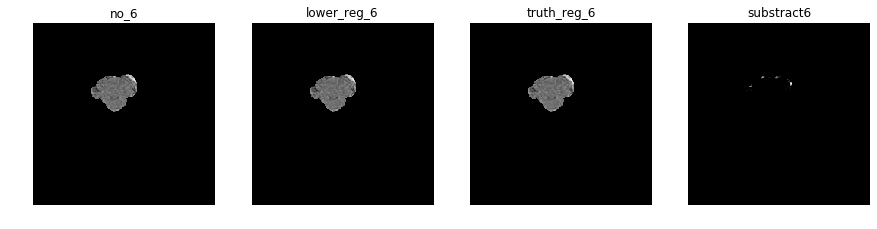

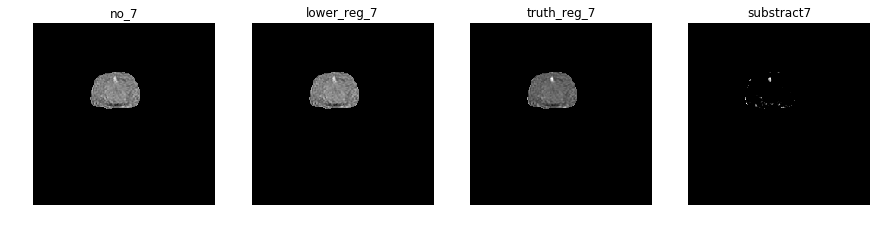

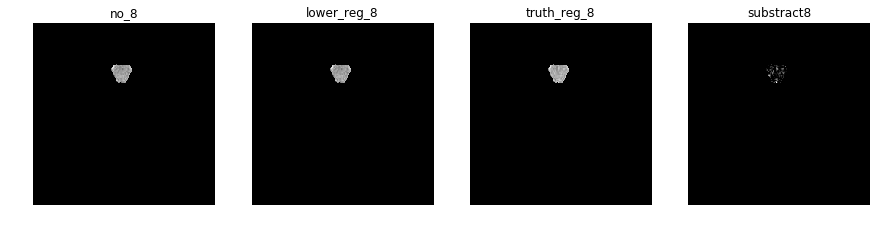

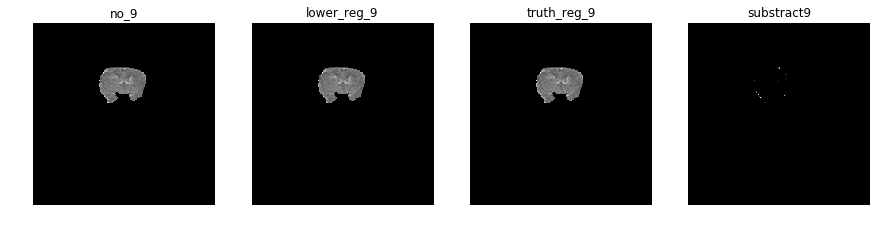

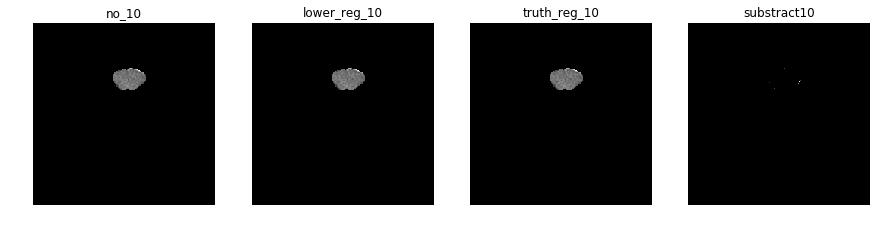

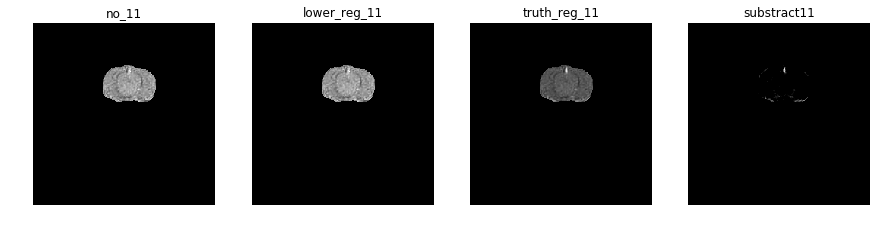

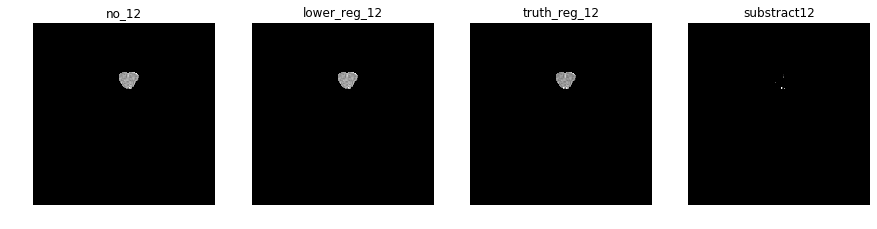

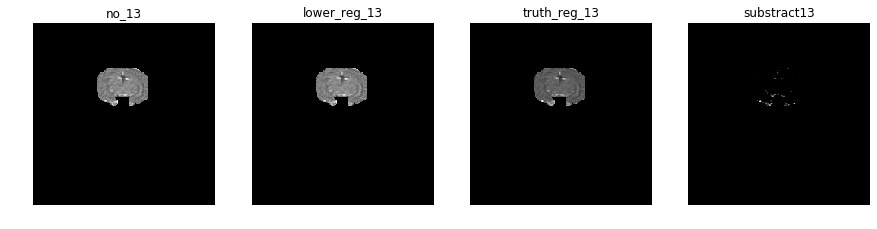

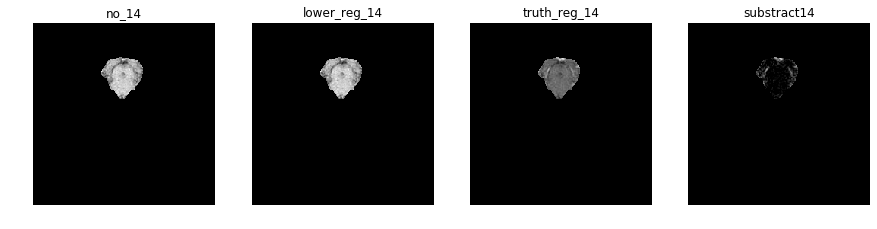

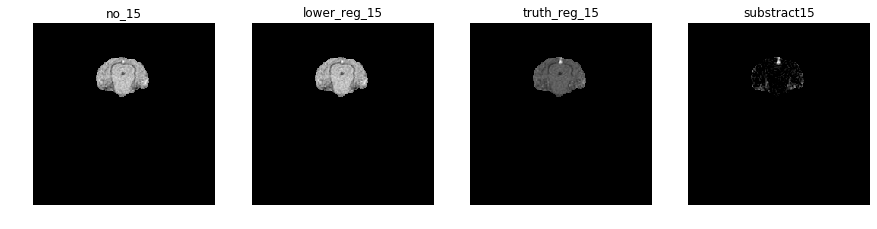

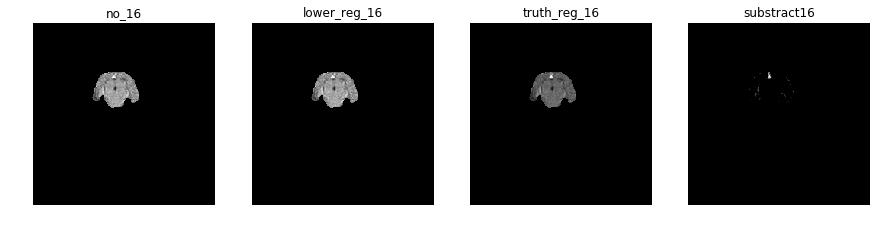

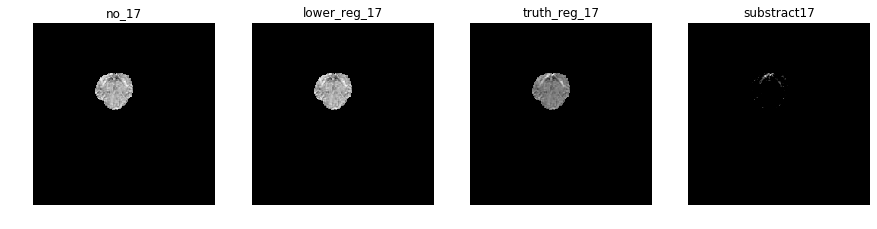

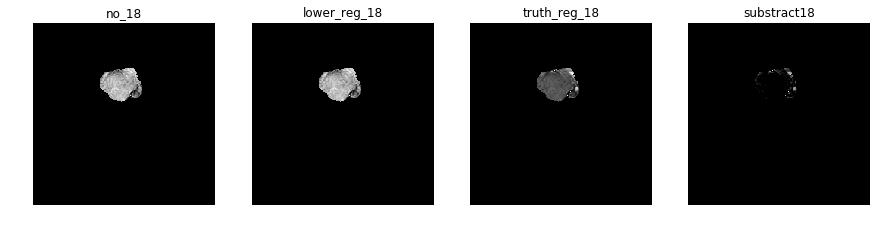

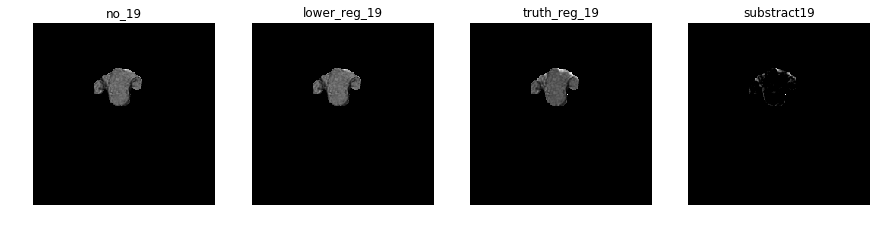

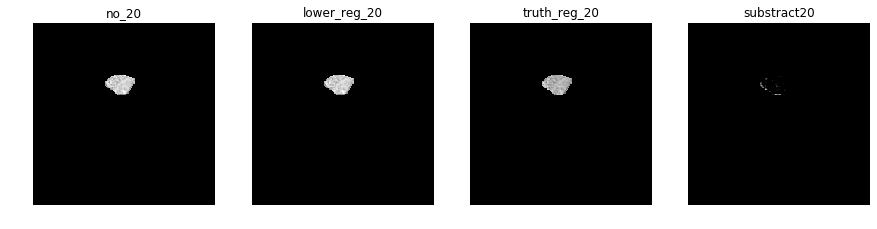

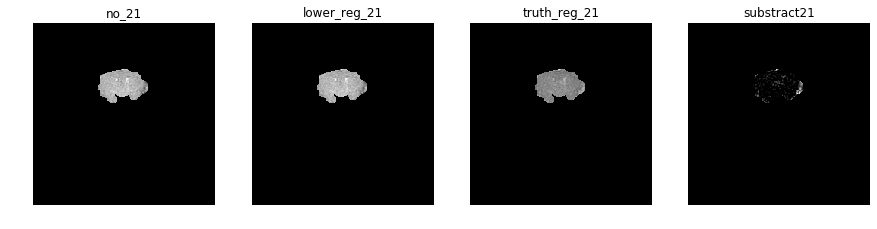

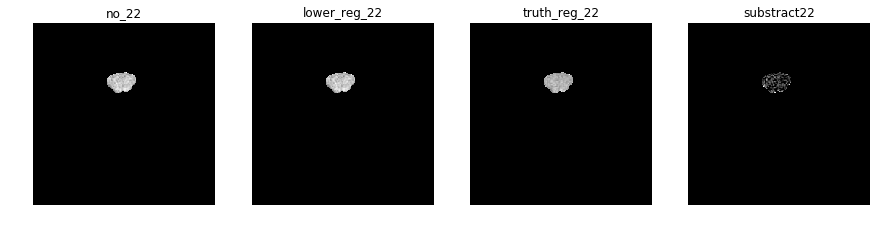

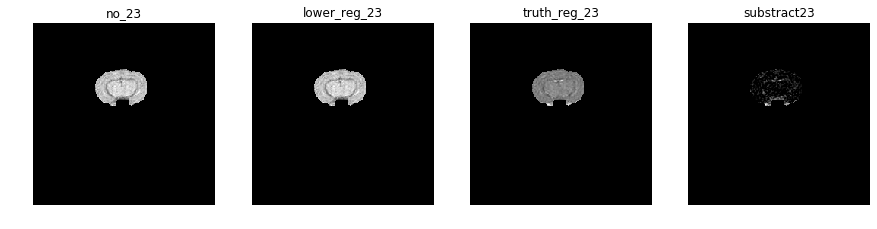

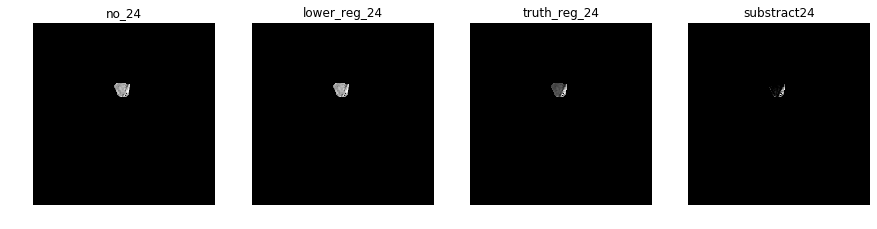

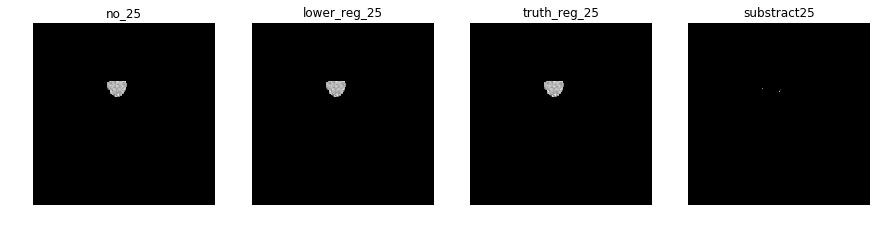

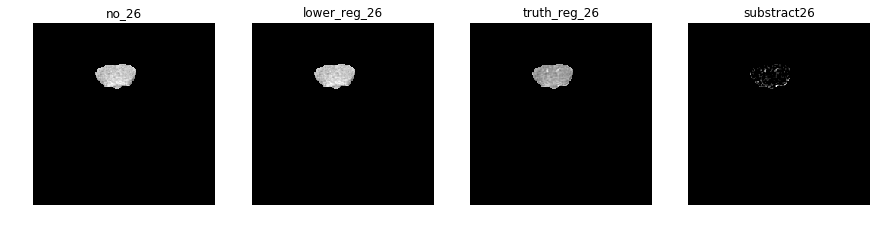

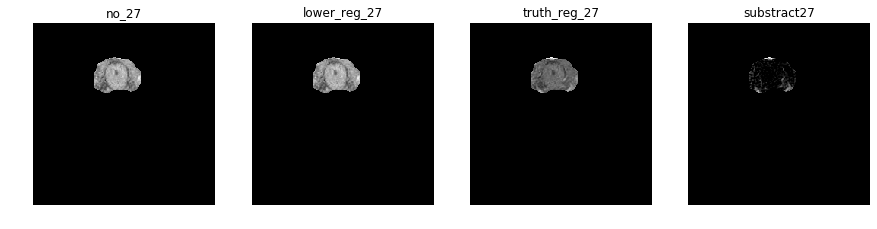

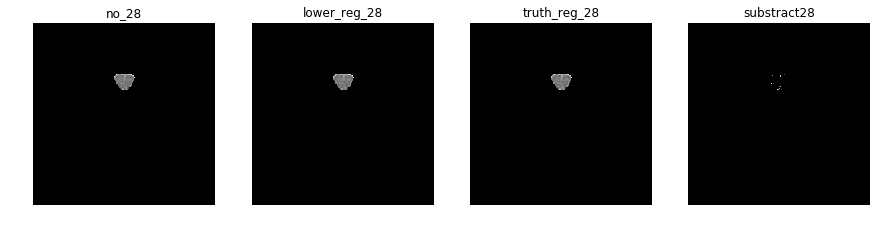

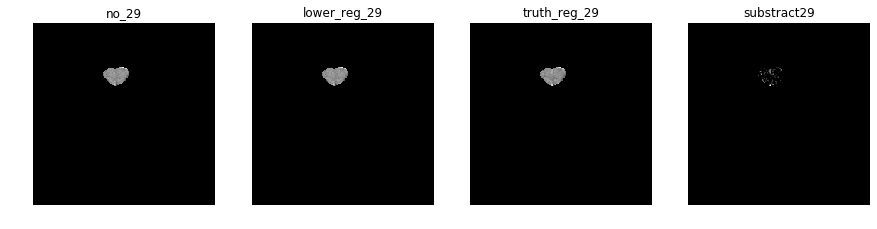

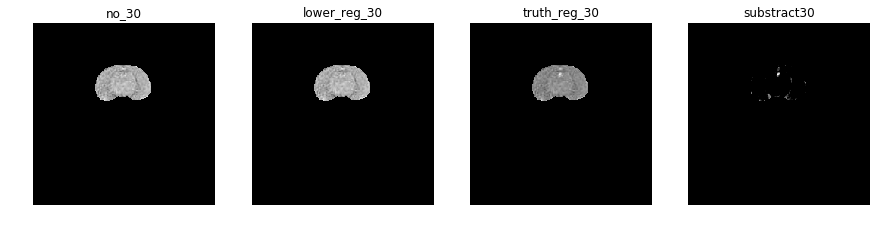

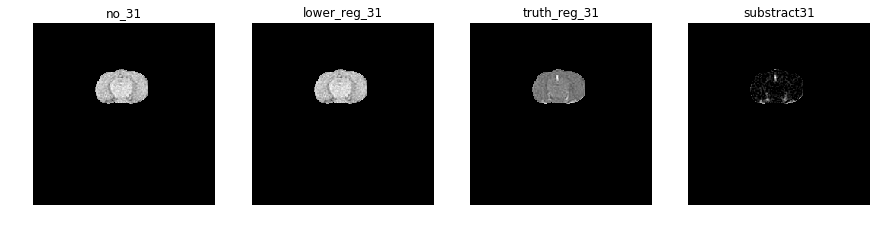

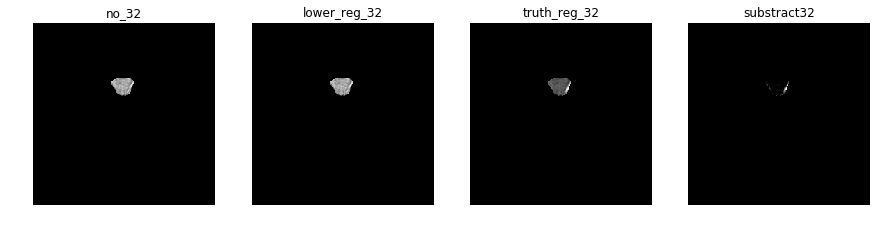

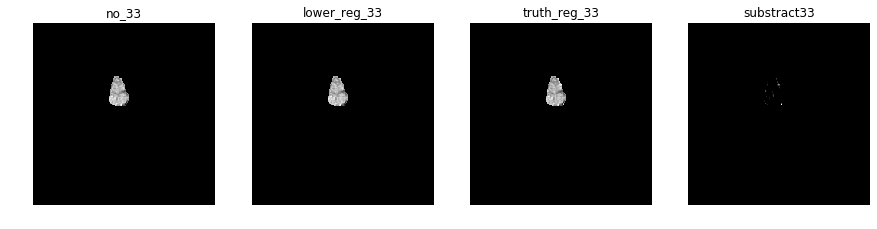

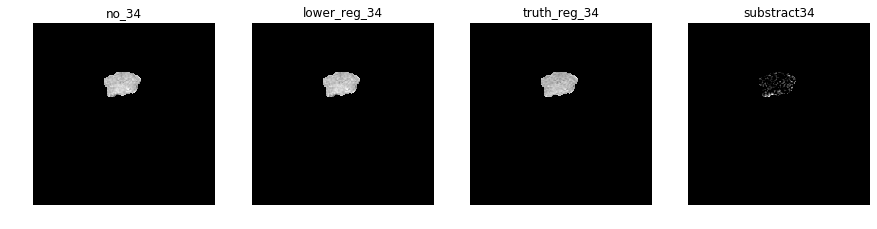

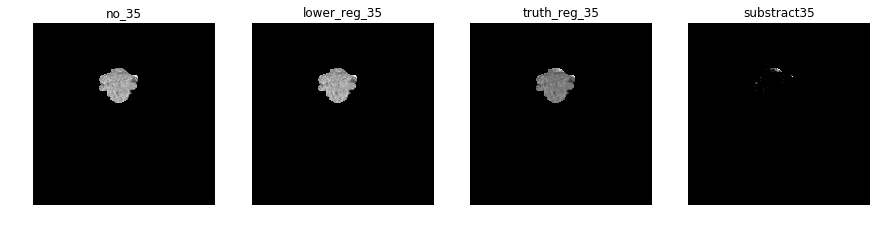

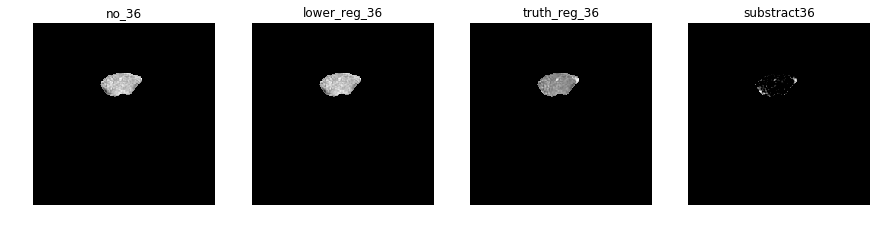

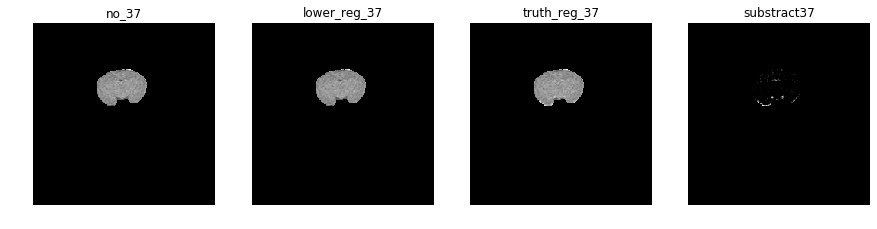

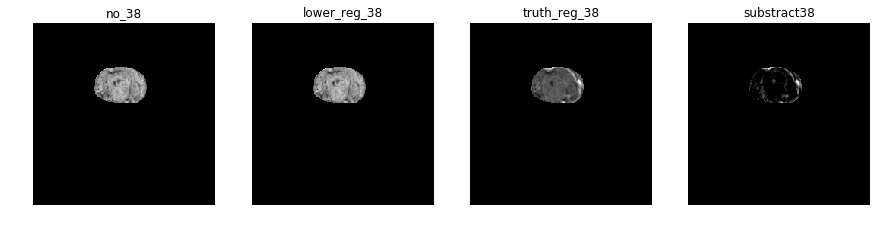

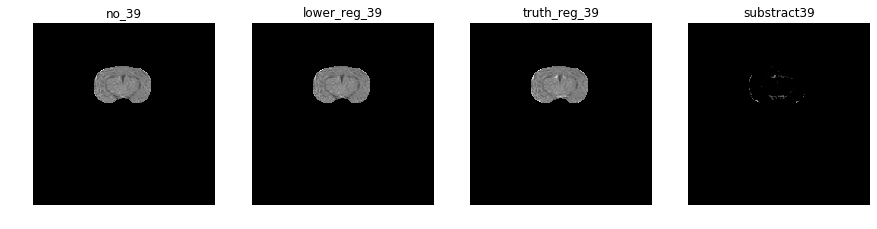

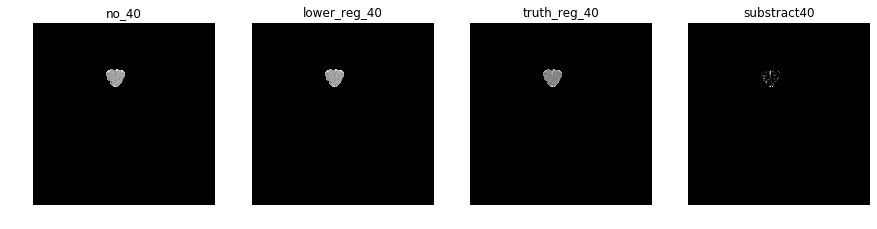

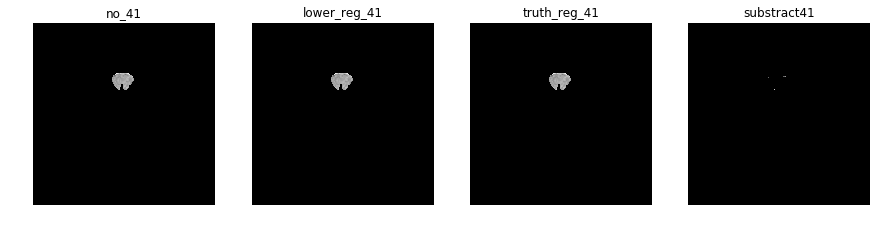

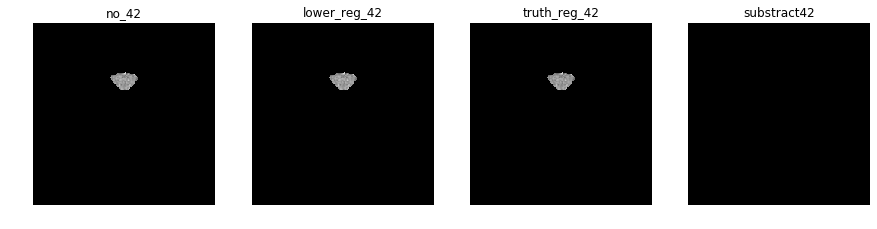

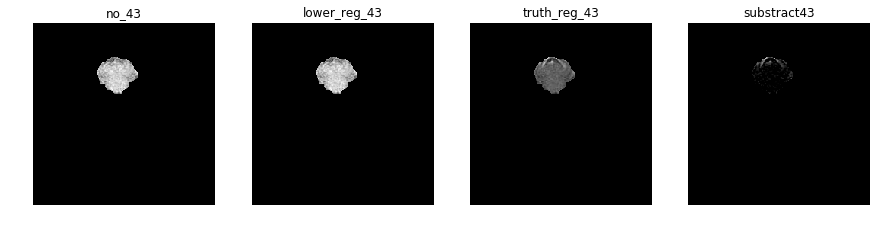

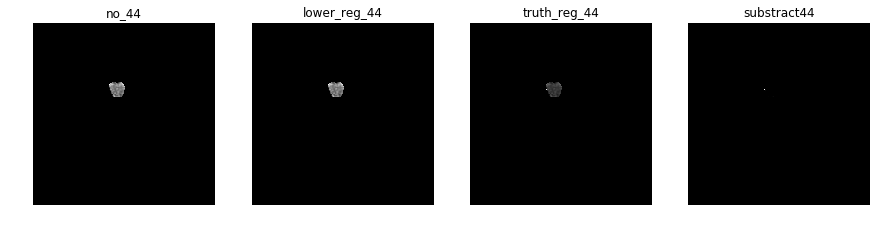

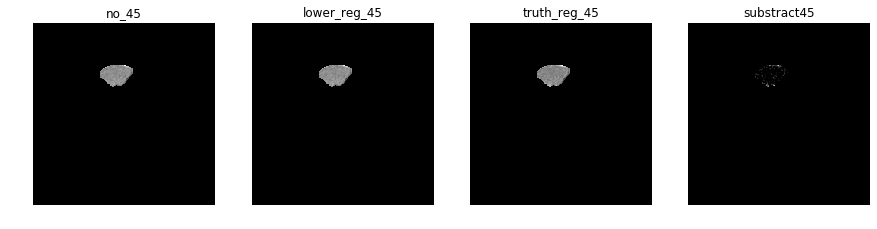

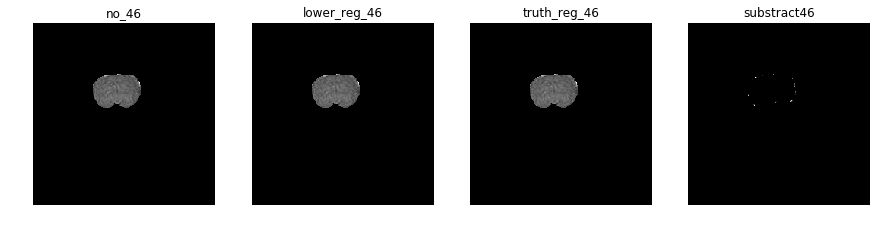

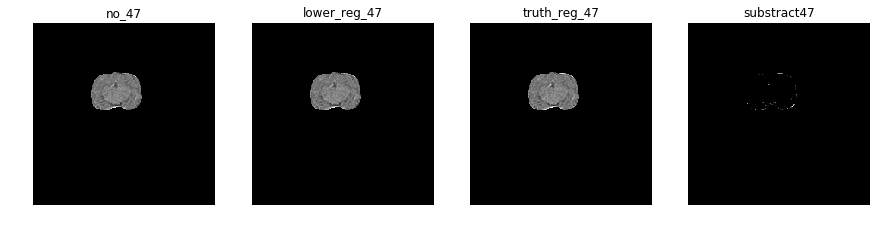

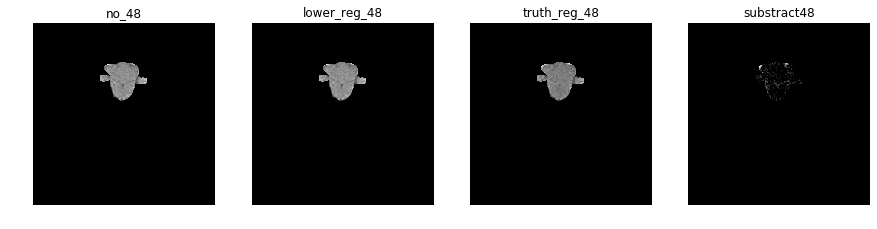

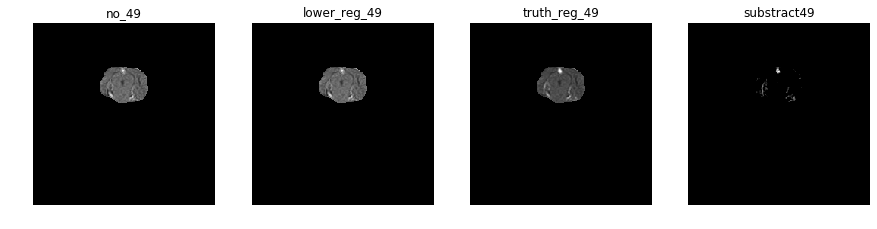

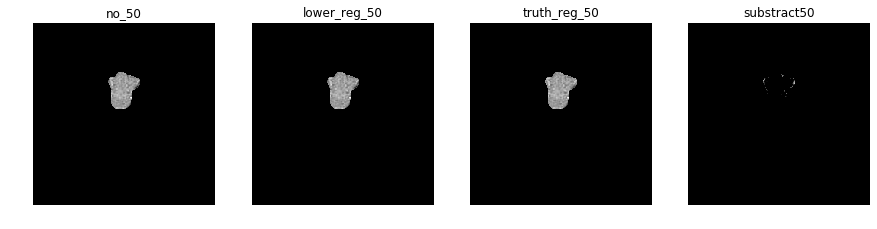

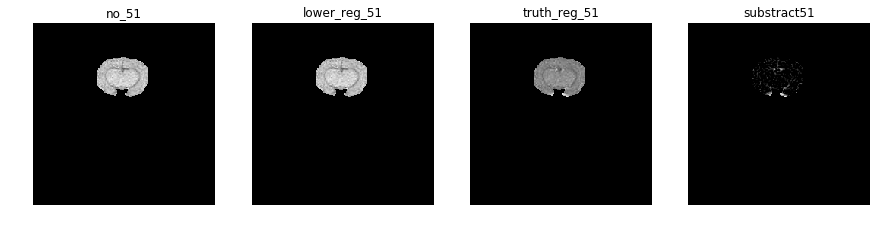

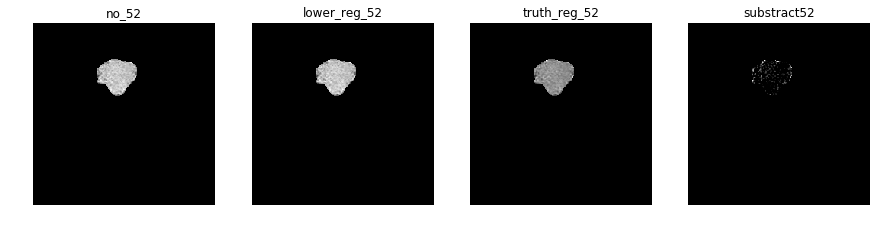

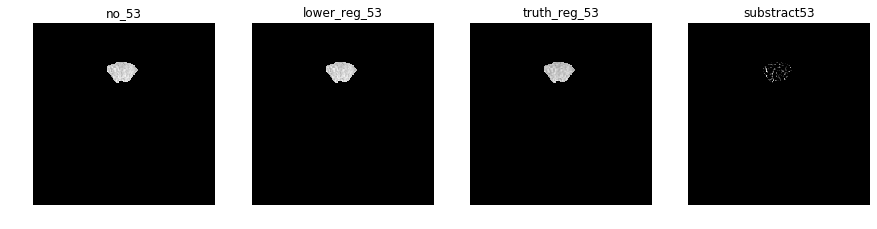

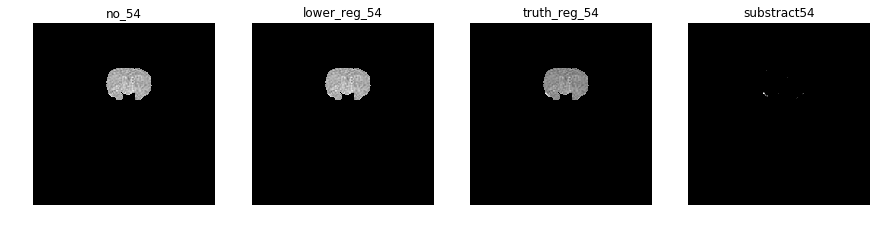

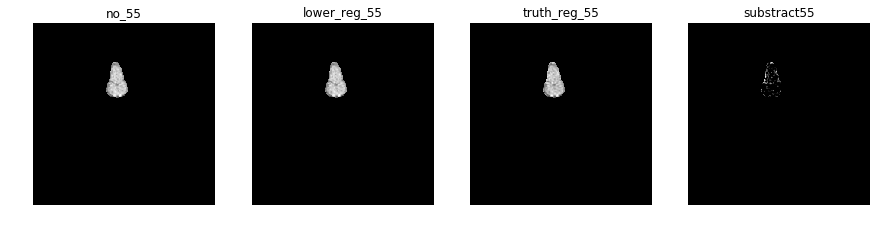

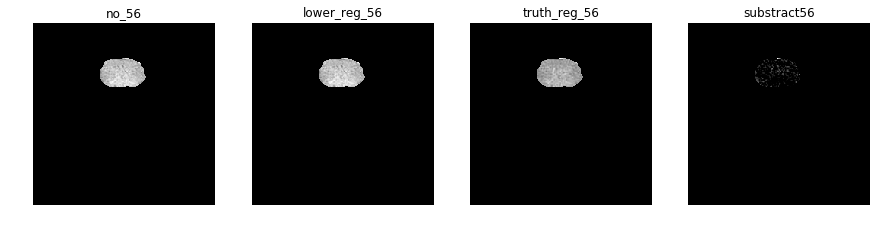

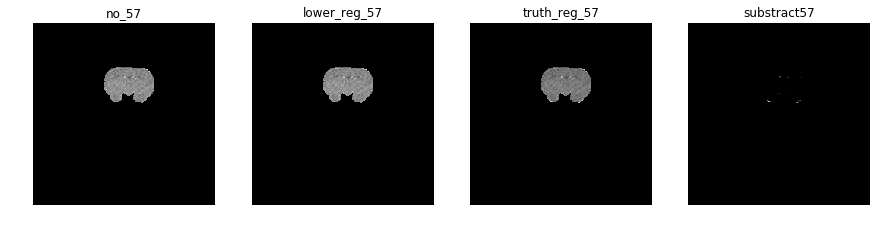

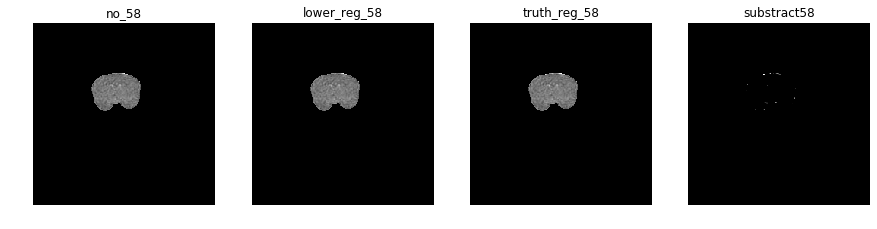

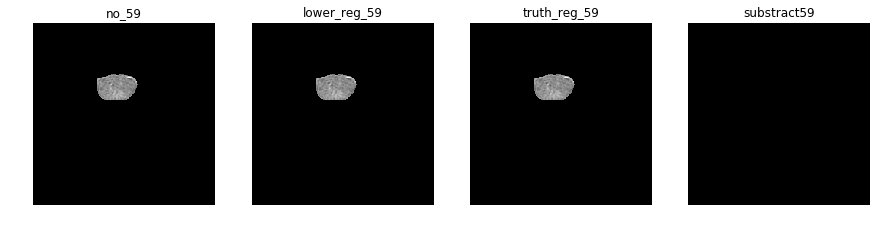

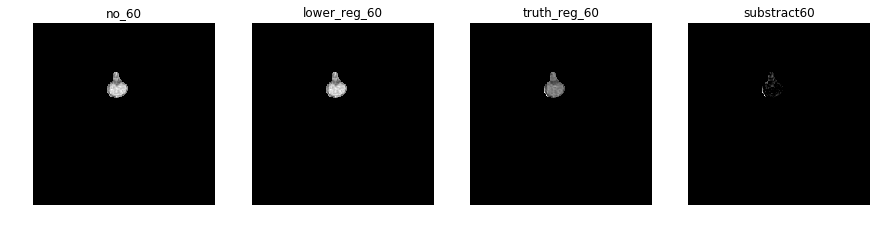

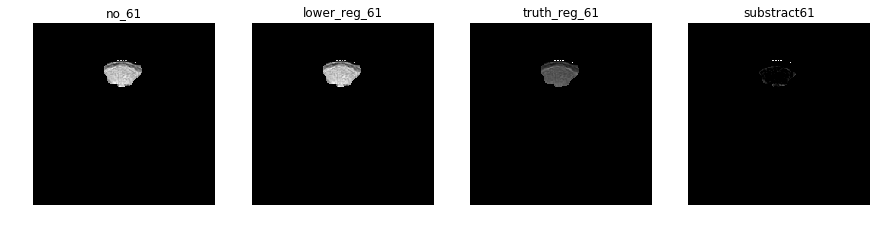

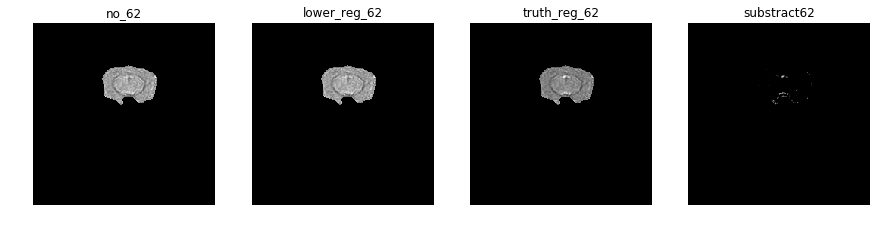

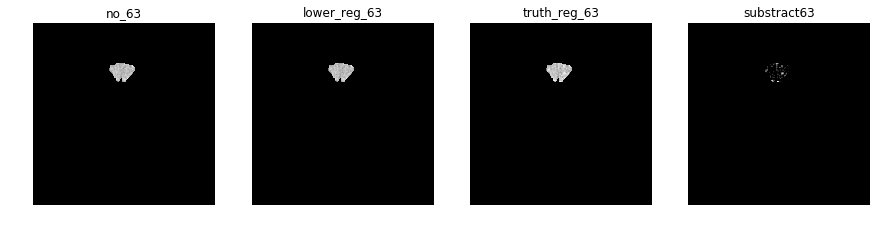

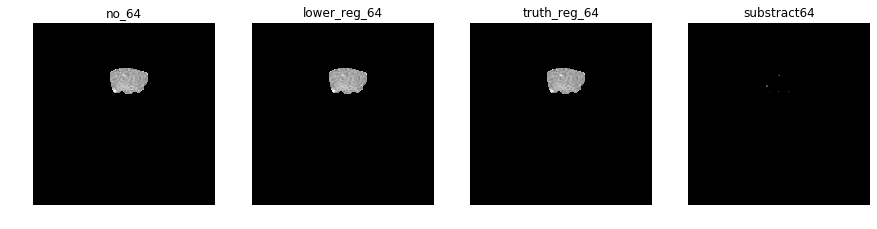

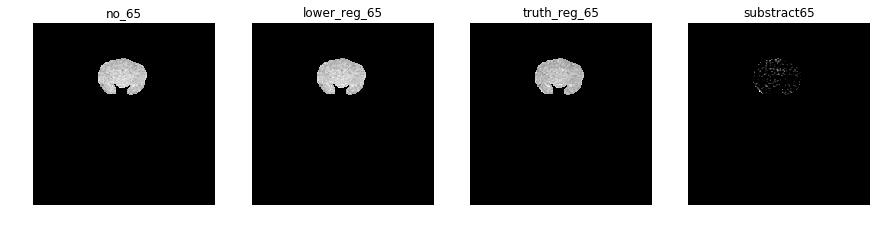

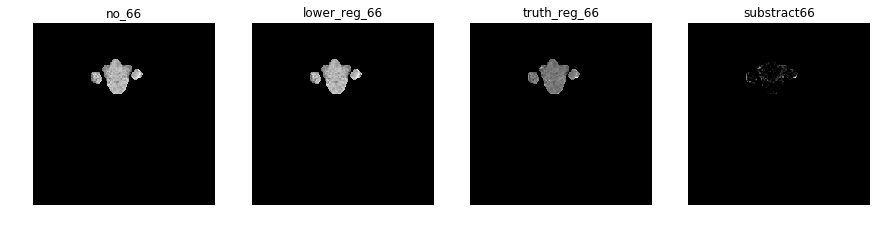

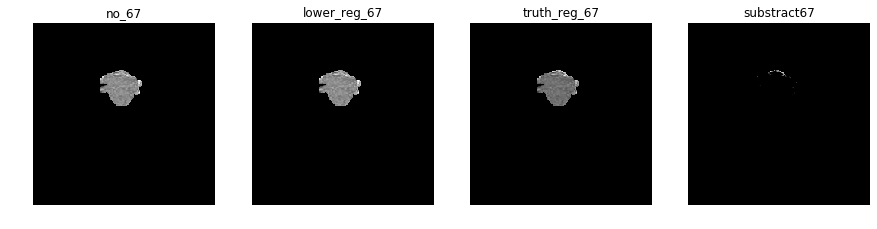

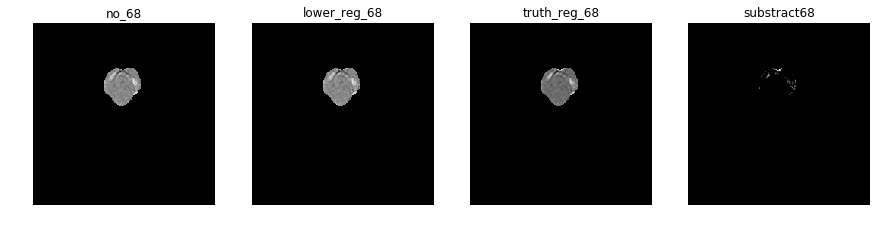

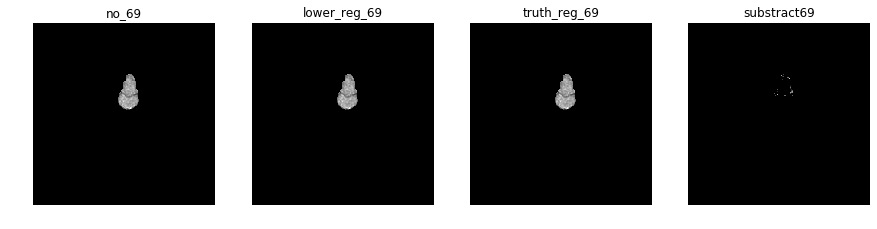

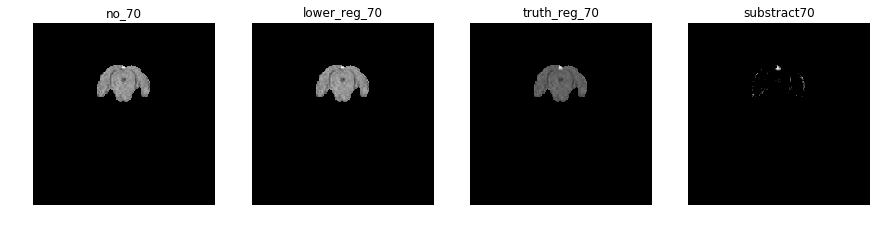

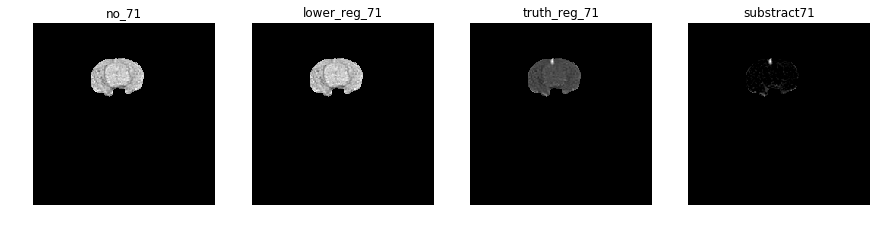

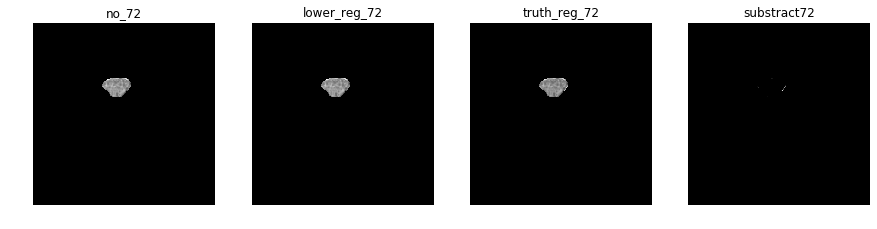

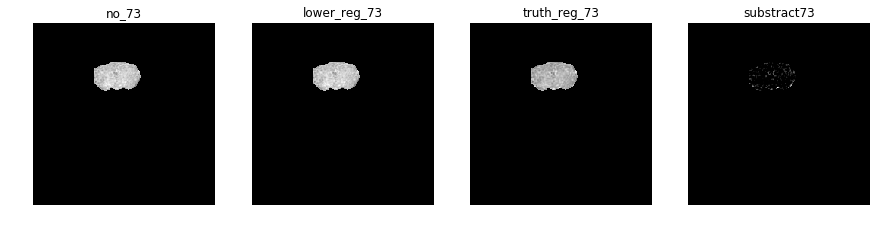

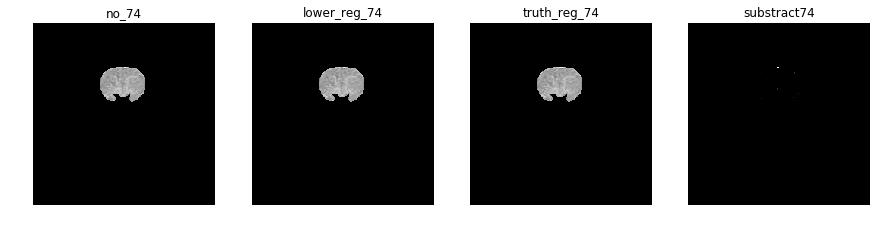

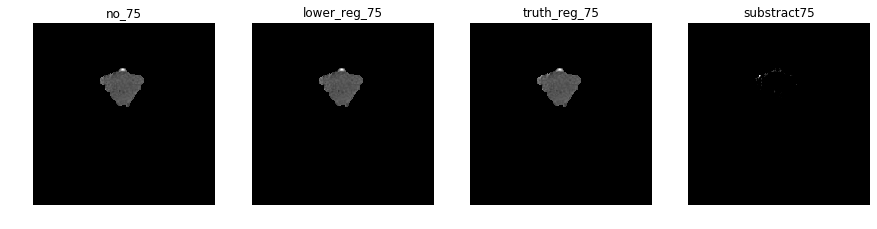

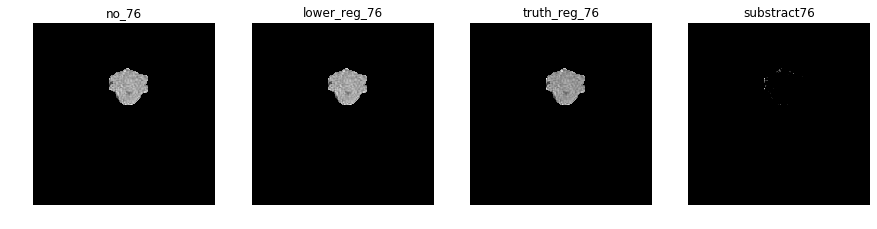

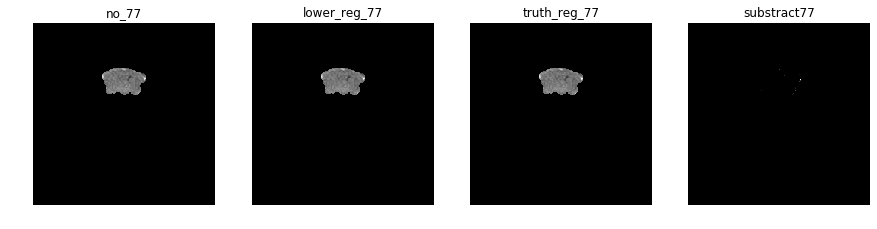

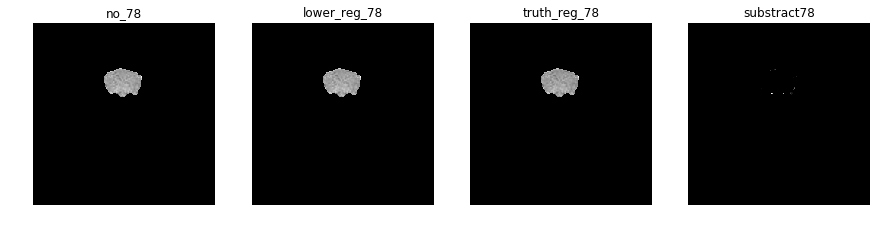

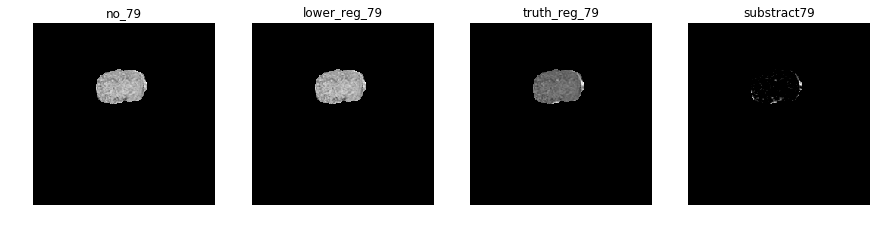

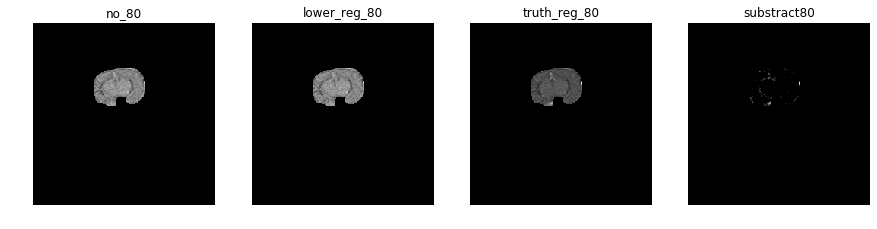

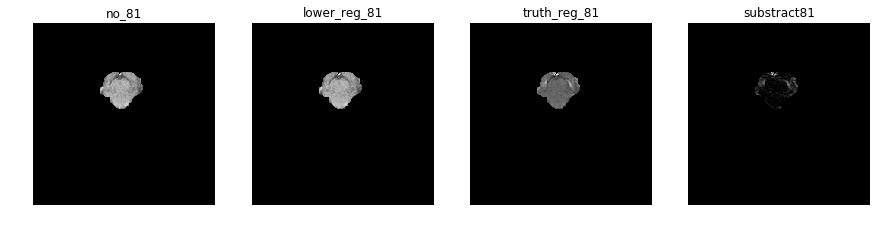

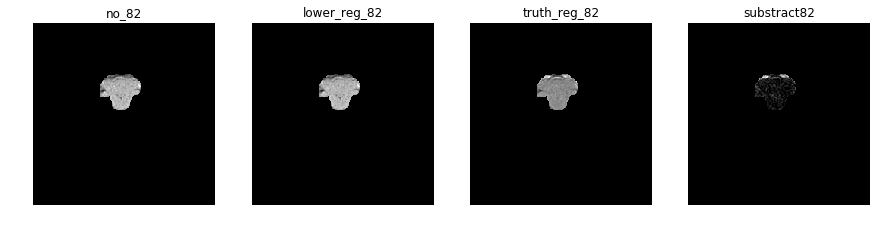

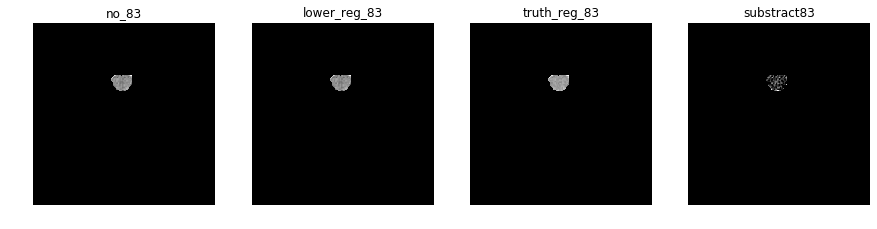

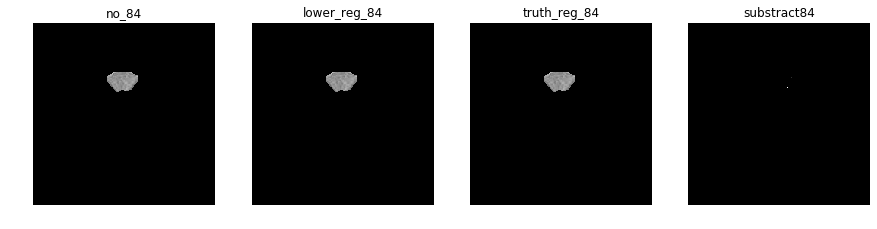

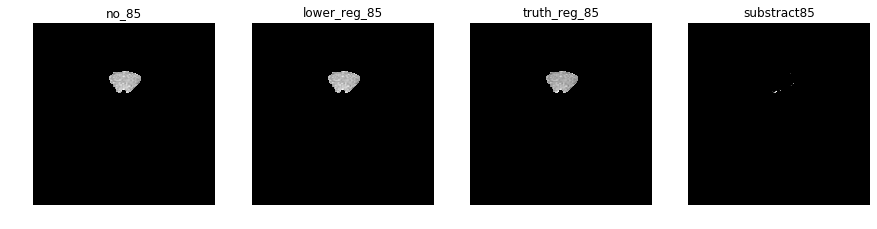

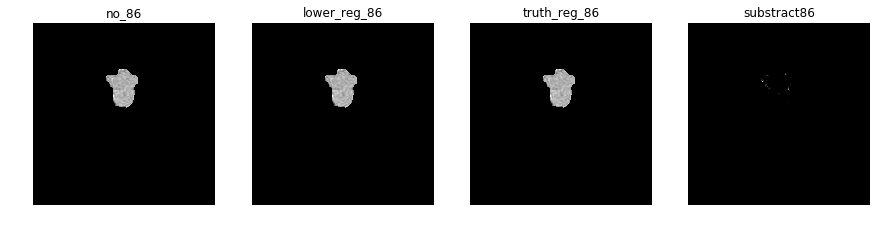

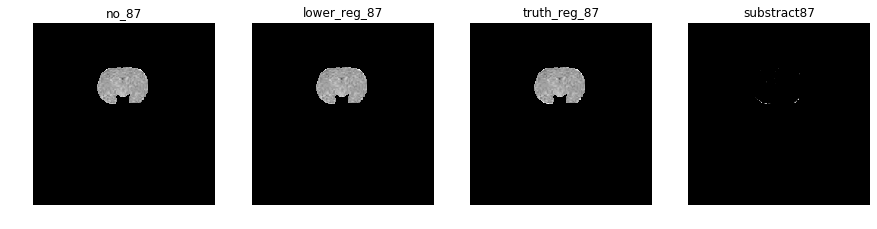

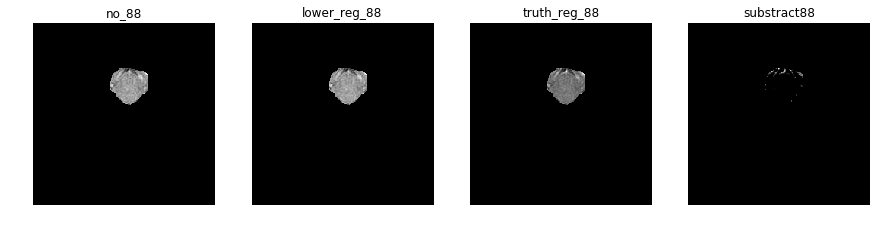

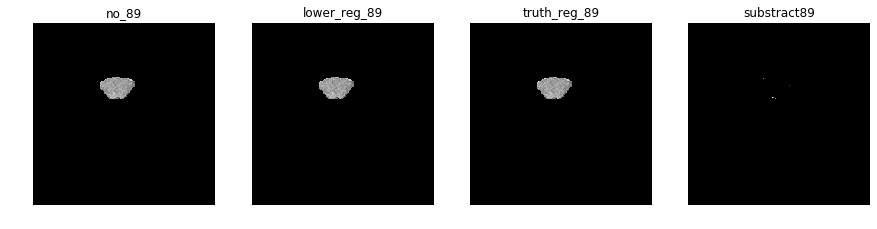

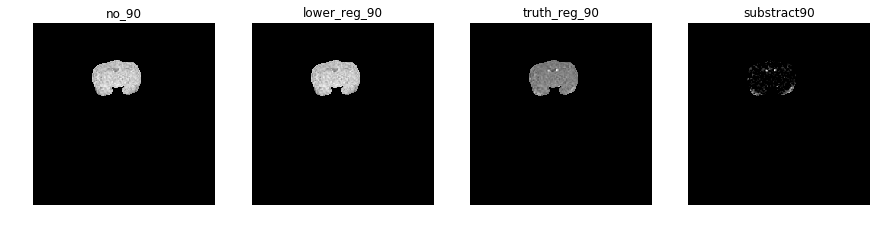

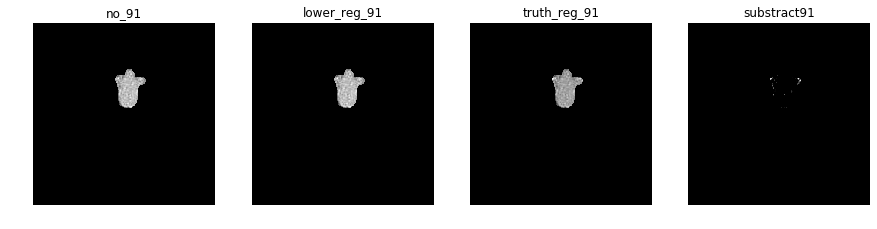

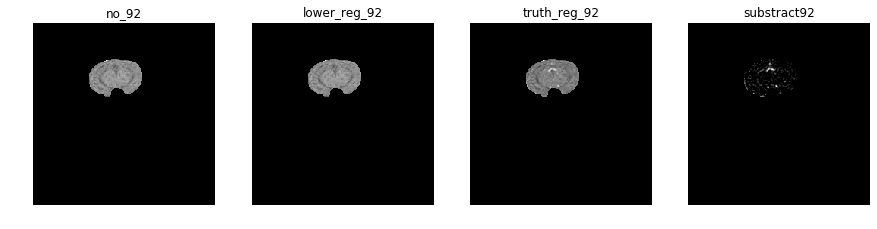

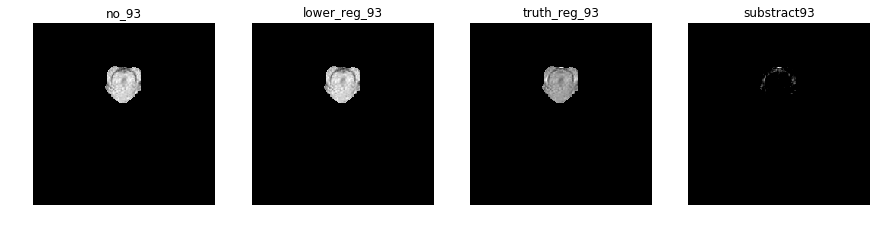

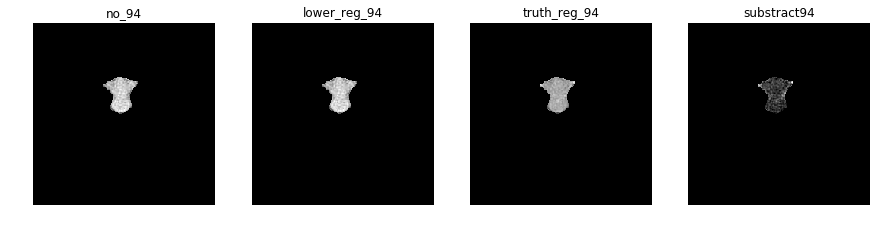

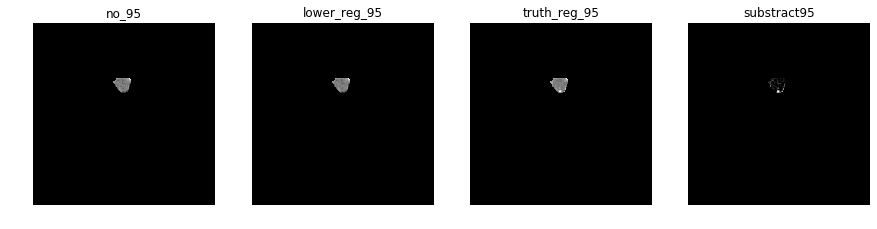

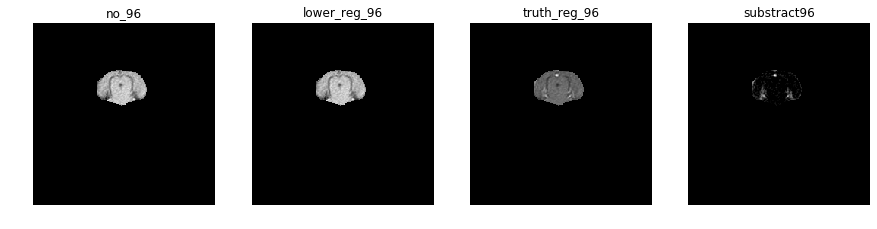

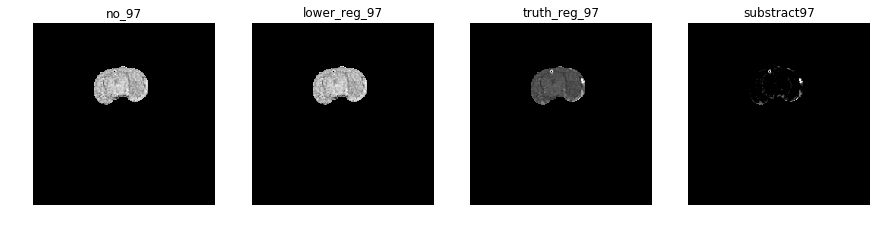

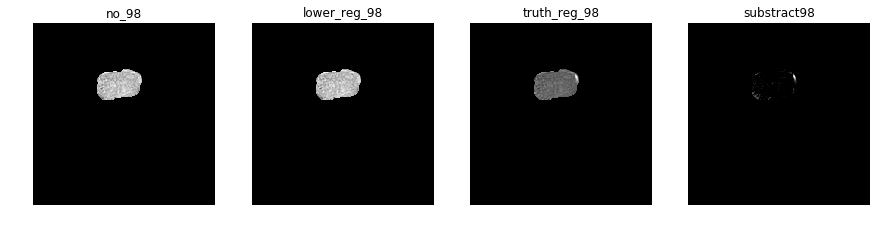

In [19]:
for i in range(len(lno_list)):
    plt.figure(figsize=(15,5))
    
    label_img = label_list[i]/255.
    
    no_img = lno_list[i]*label_img 
    lower_img = llower_list[i]*label_img
    full_img = lfull_list[i]*label_img
    no_img = subpic(full_img, no_img)
    lower_img = subpic(full_img, no_img)
    sub_img = full_img - no_img
    
    plt.subplot(1,4,1)
    plt.title("no_" + str(i))
    
    plt.imshow(no_img, cmap='gray')
    plt.axis('off') 
    
    plt.subplot(1,4,2)
    plt.title("lower_reg_" + str(i))
    
    plt.imshow(lower_img, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1,4,3)
    plt.title("truth_reg_" + str(i))
    
    plt.imshow(full_img, cmap='gray')
    plt.axis('off')

    plt.subplot(1,4,4)
    plt.title("substract" + str(i))
    sub_img = sub_img.astype('uint8')
    plt.imshow(sub_img, cmap='gray')
    plt.axis('off')
    plt.show()
    
    opsnrmean.append(compute_psnr_mean(no_img, full_img))
    opsnrroi.append(compute_psnr_roi(no_img, full_img))
    ossim.append(compute_ssim(no_img, full_img))

In [7]:
ndopsnrmean = np.asarray(opsnrmean)
ndopsnrroi = np.asarray(opsnrroi)
ndossim = np.asarray(ossim)
print(ndopsnrmean.mean(), ndopsnrmean.std())
print(ndopsnrroi.mean(), ndopsnrroi.std())
print(ndossim.mean(), ndossim.std())

37.2275384792 4.64307560176
21.2768852072 3.62204154704
0.984839192486 0.00860905972157
